<a href="https://colab.research.google.com/github/Kali-AI02/FUTURE_Interns_ML_02/blob/main/Future_intern_ML02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')
df.info()
df.head()
df.describe()
print(df['sentiment'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [24]:
df.head()

,review,sentiment,review_length
0,one of the other reviewers has mentioned that ...,1,300
1,a wonderful little production the filming tech...,1,156
2,i thought this was a wonderful way to spend ti...,1,161
3,basically theres a family where a little boy j...,0,128
4,petter matteis love in the time of money is a ...,1,222
5,probably my alltime favorite movie a story of ...,1,117
6,i sure would like to see a resurrection of a u...,1,149
7,this show was an amazing fresh innovative ide...,0,166
8,encouraged by the positive comments about this...,0,123
9,if you like original gut wrenching laughter yo...,1,31


In [25]:
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Text cleaning function
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    return text

df['review'] = df['review'].apply(clean_text)

# Encode labels
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences for uniform input length
max_len = 100  # You can adjust this
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


In [26]:
df.head()

,review,sentiment,review_length
0,one of the other reviewers has mentioned that ...,1,300
1,a wonderful little production the filming tech...,1,156
2,i thought this was a wonderful way to spend ti...,1,161
3,basically theres a family where a little boy j...,0,128
4,petter matteis love in the time of money is a ...,1,222


In [20]:
print(df['sentiment'].unique())


[1 0]


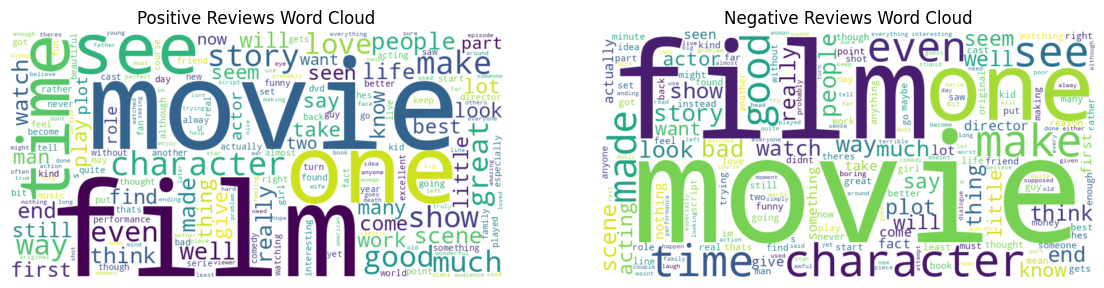

In [21]:
# Separate positive and negative reviews
positive_reviews = ' '.join(df[df['sentiment'] == 1]['review'])
negative_reviews = ' '.join(df[df['sentiment'] == 0]['review'])

# Generate word clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot word clouds
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')
plt.show()


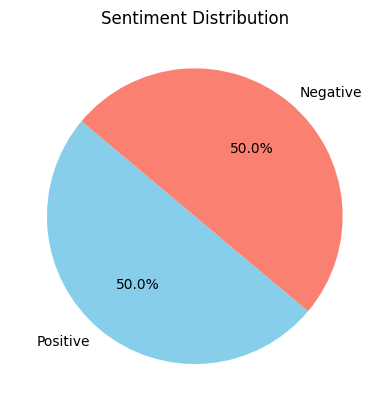

In [27]:
# Plot sentiment distribution
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'], labels=['Positive', 'Negative'])
plt.ylabel('')
plt.title('Sentiment Distribution')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


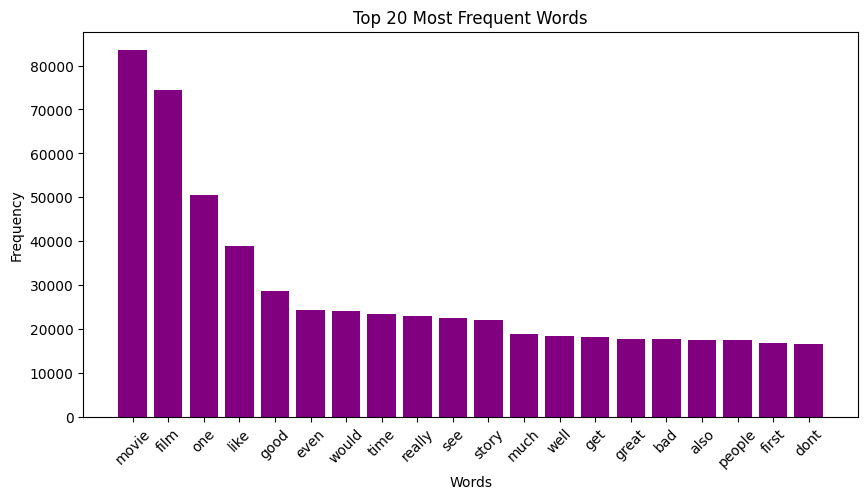

In [28]:
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Combine all reviews and remove stopwords
all_words = ' '.join(df['review']).split()
filtered_words = [word for word in all_words if word not in stop_words]

# Find most common words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# Plot most common words
words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='purple')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()


<ipython-input-18-352e0757fb81>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['sentiment'] == 'positive']['review_length'], label='Positive', shade=True)
<ipython-input-18-352e0757fb81>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['sentiment'] == 'negative']['review_length'], label='Negative', shade=True)


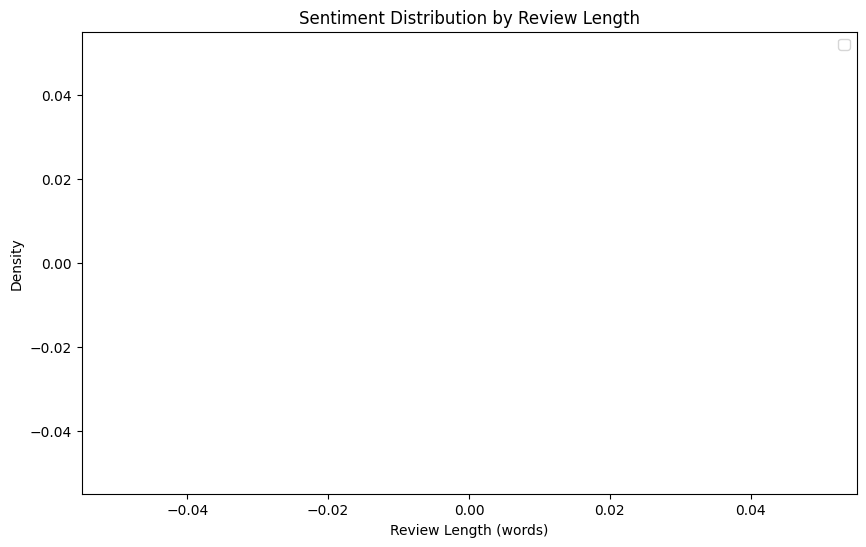

In [18]:
import seaborn as sns

# Plot sentiment distribution by review length
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['sentiment'] == 'positive']['review_length'], label='Positive', shade=True)
sns.kdeplot(df[df['sentiment'] == 'negative']['review_length'], label='Negative', shade=True)
plt.xlabel('Review Length (words)')
plt.ylabel('Density')
plt.title('Sentiment Distribution by Review Length')
plt.legend()
plt.show()


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Build the model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=max_len),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 219s 344ms/step - accuracy: 0.7283 - loss: 0.5056 - val_accuracy: 0.8509 - val_loss: 0.3505
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 247s 320ms/step - accuracy: 0.8788 - loss: 0.2951 - val_accuracy: 0.8592 - val_loss: 0.3267
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 324ms/step - accuracy: 0.9009 - loss: 0.2514 - val_accuracy: 0.8517 - val_loss: 0.3509
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 262s 324ms/step - accuracy: 0.9153 - loss: 0.2133 - val_accuracy: 0.8543 - val_loss: 0.3673
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 255s 313ms/step - accuracy: 0.9271 - loss: 0.1862 - val_accuracy: 0.8520 - val_loss: 0.3734


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict and evaluate
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Convert predictions for metrics calculation
y_pred = y_pred.flatten()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step
Accuracy: 0.852
Precision: 0.8521670294874332
Recall: 0.8545346298868823
F1 Score: 0.8533491874752279


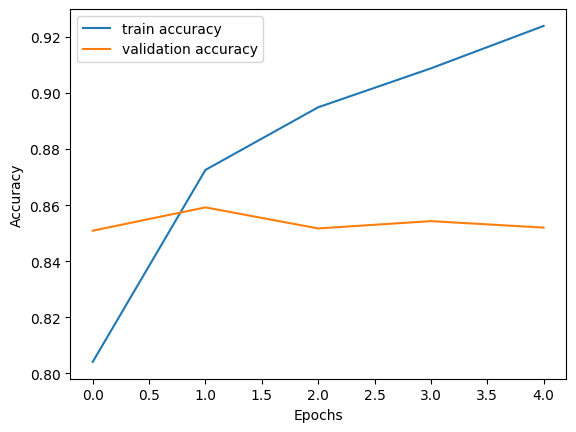

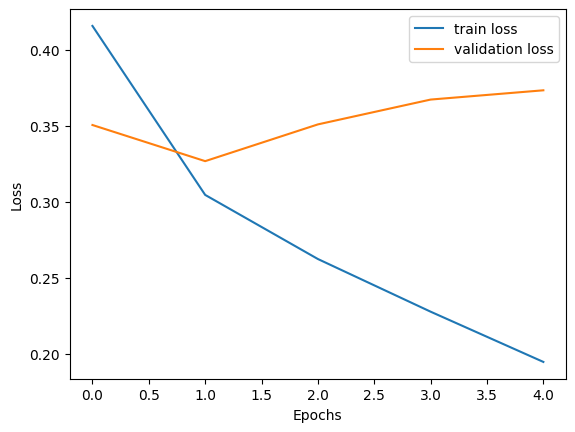

In [13]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
